In [5]:
with open('reviewfile.txt') as out:
  bag = out.read().splitlines()

import nltk
#nltk.download('book')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import sklearn

sent = [(',').join(bag[i].lstrip('\(\)').split(',')[:-1]) for i in range(0,len(bag))]

corpus = []
for i in range(len(sent)):
    review = re.sub('[^a-zA-Z]',' ',sent[i])
    review = review.lower()
    review = review.split()
    ps = WordNetLemmatizer()
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()


In [ ]:
with open('reviewfilely.txt') as out:
  bagly = out.read().splitlines()

sentence = [(',').join(bagly[i].lstrip('\(\)').split(',')[:-1]) for i in range(0,len(bagly))]

corpusnew = []

for i in range(len(sentence)):
    review = re.sub('[^a-zA-Z]',' ',sentence[i])
    review = review.lower()
    review = review.split()
    ps = WordNetLemmatizer()
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpusnew.append(review)


In [ ]:
#Extracted aspect-terms with for each aspect-category from the text corpus

from gensim.models import Word2Vec
import pandas as pd

words_list = pd.DataFrame(corpus)

words_list.columns
words_list[1] = words_list[0].apply(word_tokenize)

model = Word2Vec(words_list[1] , min_count=1)
print (list(model.wv.vocab))
#print(vocabulary)
X = model[model.wv.vocab]

from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,avoid_empty_clusters=True,repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

from collections import Counter

df = pd.DataFrame()
df = df.assign(key = Counter(assigned_clusters).keys() , value = Counter(assigned_clusters).values())

import plotly.express as px
fig = px.bar(df, x="key", y="value", color='key')
fig.show()


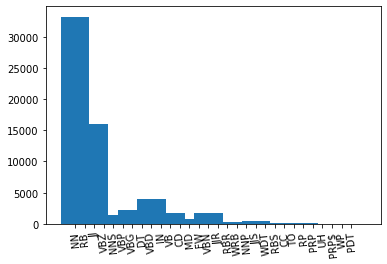

In [10]:
#word classification count of verbs , adj

#!pip install wordcloud

from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import numpy as np                                                               
import matplotlib.pyplot as plt
from collections import Counter
obt = []
wordlst = []
df = pd.DataFrame(corpus)

df.columns
df[1] = df[0].apply(word_tokenize)

for i in  df[1]:
  doc = nltk.pos_tag(i)
  for (word,tag) in doc:
    obt.append(tag) 
    wordlst.append(word)

plt.bar(Counter(obt).keys(), Counter(obt).values(), 3, align='center')
plt.xticks(rotation=95)
plt.show()

#word cloud with frequency 
wine_mask = np.array(Image.open("wine_mask.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

word_could_dict=Counter(wordlst)

# Create a word cloud image
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask,stopwords=wordlst, contour_width=3, contour_color='firebrick').generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
import gensim
from gensim import corpora

#!pip install pyldavis

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
dictionary = corpora.Dictionary(df[1])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in df[1]]
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)
#From the above output we could guess that each topic and their corresponding words revolve around a common theme
# here lda gives the 7 different topics for the entire document
lda_model.print_topics()

#Shows correlation between the topics as well as the top most relevant terms for each selected topic with each words frequencies
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.051433 -0.004510       1        1  19.535034
1     -0.050858 -0.022051       2        1  19.363213
5      0.001745  0.037880       3        1  15.541937
2     -0.165369 -0.095030       4        1  13.003869
3      0.071040  0.124090       5        1  11.274152
4      0.002005  0.095155       6        1  11.123577
6      0.192870 -0.135535       7        1  10.158220, topic_info=        Term         Freq        Total Category  logprob  loglift
96     cream   347.000000   347.000000  Default  30.0000  30.0000
111      ice   231.000000   231.000000  Default  29.0000  29.0000
322  chicken   689.000000   689.000000  Default  28.0000  28.0000
42     place  1268.000000  1268.000000  Default  27.0000  27.0000
313     nice   261.000000   261.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
84     would    35.888462   244.313995   Topic7  -5.2977   0.3688
161      one    40.448746   475.022949   Topic7  -5.1781  -0.1764
529   little    30.927668   129.034958   Topic7  -5.4465   0.8585
475     best    32.847942   331.093353   Topic7  -5.3863  -0.0236
321   burger    29.082832   178.422089   Topic7  -5.5080   0.4729

[552 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
687       1  0.940603   accommodate
2219      4  0.941350  accompanying
88        2  0.898455      actually
88        3  0.084760      actually
595       1  0.978056        adding
...     ...       ...           ...
771       6  0.091096         yummy
1200      1  0.149238        zomato
1200      2  0.596951        zomato
1200      3  0.054268        zomato
1200      4  0.203506        zomato

[1049 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 3, 4, 5, 7])

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['come','order','try','go','get','make','drink','plate','dish','restaurant','place',
                  'would','really','like','great','service','came','got'])

def remove_stopwords(texts):
    return [word for word in texts if word not in stop_words]

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
    
def  get_corpus(df):
    #words = word_tokenize(df.text)
    words = remove_stopwords(df)
    bigram_mod = bigrams(words) # similar words grouped togther [(['cant', 'railway', 'station'], ['citadel', 'hotel']), (['citadel', 'hotel'], ['police', 'stn'])
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus([x for x in df[1]])

test_corpus, test_id2word, bigram_test = get_corpus([x for x in dfnew[1]])


In [ ]:
import gensim

lda_train = gensim.models.ldamulticore.LdaMulticore(corpus=train_corpus,
                           num_topics=20,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)


In [ ]:
train_vecs = []

for i in range(len(df[0])):
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)

In [ ]:

test_vecs = []

for i in range(len(dfnew[0])):
    top_topics = lda_train.get_document_topics(test_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    test_vecs.append(topic_vec)



In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np                                                               

X = np.array(train_vecs)
r = [(',').join(bag[i].rstrip('\(\)').split(',')[-1]) for i in range(0,len(bag))]
y = np.array([s.replace(',','') for s in r])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,
                                    criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix

cm2= confusion_matrix(y_test, y_pred)# 93.9


#SVM
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

cm3= confusion_matrix(y_test, y_pred)#87.3


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np                                                               

X = np.array(test_vecs)
r = [(',').join(bagly[i].rstrip('\(\)').split(',')[-1]) for i in range(0,len(bagly))]
y = np.array([s.replace(',','') for s in r])

from sklearn.preprocessing import StandardScaler
X_test = sc.transform(X)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
y_pred = classifier.predict(X_test)
cm2= confusion_matrix(y, y_pred)#(78.2)

#SVM
from sklearn.svm import SVC
y_pred = classifier1.predict(X_test)
cm3= confusion_matrix(y, y_pred) #(87.4)

#If the supervised F1-scores on the unseen data generalizes, then we can posit that the 2020 topic model has identified latent semantic structure that persists over time in this restaurant review domain.
